# Búsqueda por anchura

## Introducción

En esta entrada hablaremos de búsquedas en gráficas. Nos enfocaremos en la búsqueda por anchura. A grandes rasgos, nos permite comenzar en un vértice $v$ de una gráfica y explorar todos los vértices de su componente conexa. Los va recorriendo de una manera muy particular, en la que se garantiza que el orden en el cual se visitan los vértices depende de su cercanía a $v$.

## Descripción de búsqueda por anchura

Cuando hablamos de una **búsqueda** en una gráfica, nos referimos a un algoritmo que pase por todos sus vértices y todas sus aristas. En este contexto, usualmente trabajaremos con una gráfica dada por sus listas de adyacencia. Recordemos que esto quiere decir que para cada vértice conocemos a sus vecinos. Los algoritmos de búsqueda que mencionaremos explotarán esto: comenzarán con un vértice e irán explorando nuevos vértices que sean vecinos a los ya descubiertos. La diferencia entre distintos algoritmos es que deciden ir a vértices distintos en momentos distintos.

En este contexto, mientras estamos haciendo una búsqueda, conviene pensar a cada vértice en alguno (y sólo uno) de los siguientes estados:

- **Por encontrar.** Todavía no hemos visto al vértice en nuestro recorrido.
- **Encontrado sin procesar.** Ya vimos el vértice en algún momento de nuestro recorrido, pero aún no hemos visto a todos sus vecinos.
- **Procesado.** Ya vimos al vértice y a todos sus vecinos.

La **búsqueda por anchura** es una manera de hacer la exploración. Si tomamos una gráfica $G$ y un vértice $v_0$ con el cual empezar, la búsqueda por anchura a grandes rasgos hace lo siguiente.

- Se define una lista $L$ de vértices por procesar, un conjunto $E$ de vértices encontrados y un conjunto $P$ de vértices procesados.
- Se agrega $v_0$ a la lista $L$ y al conjunto $E$.
- Mientras haya al menos un elemento $v$ en $L$, debemos procesarlo, es decir, explorar sus vecinos. Para ello, cada vecino $w$ de $v$ sin encontrar ni procesar se agrega al conjunto $E$ y al final de la lista $L$ (para procesarlo más adelante). Como ya apuntamos los vecinos de $v$ que falta visitar, pasamos $v$ de $L$ a $P$.

La descripción anterior también nos permite encontrar todas las aristas. Cuando consideremos un vecino $w$ de $v$ podemos aprovechar para visitar la arista $vw$, incluso aunque $w$ no sea agregado en ese momento a $L$.

Si $G$ es una gráfica conexa, este procedimiento garantiza que pasaremos por cualquier vértice y cualquier arista. Al inicio, se visita $v_0$ y todos sus vecinos. Luego, se visitan los vecinos de los vecinos de $v_0$ que no hayamos visto. Luego los vecinos de estos que no hayamos visto. Y así sucesivamente. Como pasamos por todos los vértices, entonces pasamos por todas las aristas pues consideramos todos los vecinos de todos los vértices.

Antes de agregar un elemento a $L$ para ser procesado más adelante, nos aseguramos que no haya sido procesado anteriormente y que no esté ya en la lista para ser procesado. Esto ayuda a evitar redudancias: ningún vértice es procesado más de una vez. Las aristas las visitamos dos veces: una vez cada que estamos en uno de sus extremos. Esto tiene un poco de redundancia, pero es útil cuando consideramos gráficas dirigidas en vez de gráficas. Esto esboza el argumento de por qué la búsqueda por anchura tiene complejidad $O(n+m)$, en donde $n$ es el número de vértices de la gráfica y $m$ es el número de aristas.

## Implementación de búsqueda por anchura

Veamos algunos ejemplos de búsqueda por anchura. Para ello, primero daremos una implementación en Python, con apoyo de la librería `networkx`. Como argumentos a la función, tenemos:
- `G`, la gráfica a explorar.
- `v0`, el vértice donde comienza la búsqueda por anchura.

In [1]:
import networkx as nx

def BFS(G,v0):
    encontrados={v0}
    procesados=set()
    en_proceso=[v0]
    while en_proceso:
        v=en_proceso[0]
        print(v) #Aquí decidimos que hacer al comenzar a procesar un vértice
        for w in G.neighbors(v):
            if (w not in procesados) and (w not in encontrados):
                encontrados.add(w)
                en_proceso.append(w)
        en_proceso.remove(v)
        procesados.add(v)

Veamos qué hace el código anterior. Trabajemos con la siguiente gráfica.

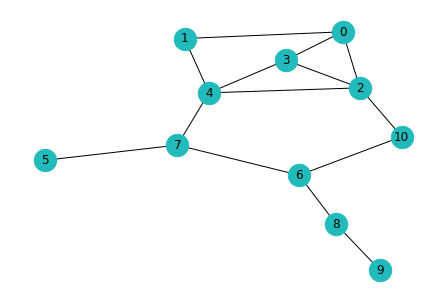

In [2]:
G = nx.Graph()
G.add_edges_from([(0,1), (0,2), (0,3), (1,4), (7,4), (10,2), (2,3), (2,4), (3,4), (6,7), (5,7), (6,8), (8,9), (6,10)])
nx.draw_kamada_kawai(G,with_labels=True, node_color='#22bbbb',node_size=500)

Al correr la búsqueda por anchura que comience en el vértice $3$, nos da el siguiente resultado.

In [3]:
BFS(G,3)

3
0
2
4
1
10
7
6
5
8
9


En efecto, vamos recorriendo los vértices comenzando en $3$ y de ahí "hacia afuera". Primero están $0,2,4$ que son los vecinos de $3$. Luego están $1,10,7$, que son los vecinos de estos que no hemos visitado. Luego en una siguiente etapa vienen $6$ y $5$. Después está $8$ y finalmente $9$. Podemos hacer una ligera modificación de la búsqueda en anchura para que en vez de mostrar los vértices, muestre todas las aristas.

In [71]:
def BFS_aristas(G,v0):
    encontrados={v0}
    procesados=set()
    en_proceso=[v0]
    while en_proceso:
        v=en_proceso[0]
        for w in G.neighbors(v):
            print((v,w)) ## Aquí decidimos qué hacer con la arista recién encontrada.
            if (w not in procesados) and (w not in encontrados):
                encontrados.add(w)
                en_proceso.append(w)
        en_proceso.remove(v)
        procesados.add(v)

BFS_aristas(G,3)

(3, 0)
(3, 2)
(3, 4)
(0, 1)
(0, 2)
(0, 3)
(2, 0)
(2, 10)
(2, 3)
(2, 4)
(4, 1)
(4, 7)
(4, 2)
(4, 3)
(1, 0)
(1, 4)
(10, 2)
(10, 6)
(7, 4)
(7, 6)
(7, 5)
(6, 7)
(6, 8)
(6, 10)
(5, 7)
(8, 6)
(8, 9)
(9, 8)


Se muestran las aristas en el orden que las encuentra la búsqueda por anchura. Cada arista queda enlistada dos veces, una cada vez que cada uno de sus extremos la descubre. Usualmente dejamos la implementación así pues:
- Es sencillo que sólo se enliste una vez cada arista rompiendo la simetría, por ejemplo, agregando un condicional `if u<v`.
- En gráficas no dirigidas sí es importante revisar ambas direcciones de $u$ a $v$ y de $v$ a $u$ pues puede que en una de ellas tengamos flecha y en la otra no.

## Algunas propiedades teóricas de búsqueda por anchura

Tomemos una gráfica conexa $G$ y un vértice $v_0$. Efectuemos una búsqueda por anchura en la gráfica. Vamos a crear un árbol enraizado como sigue. Su raíz será $v_0$. Sus otros vértices serán los otros vértices de la gráfica. Colocaremos a un vértice $w$ debajo de un vértice $v$ y pondremos una arista entre ellos si la primera vez que encontramos a $w$ es como vecino del vértice $v$ en la búsqueda por anchura. En ese caso, diremos que $v$ **descubrió** a $w$, o bien que $v$ es el **padre** de $w$.

Como la búsqueda por anchura visita todos los vértices, la gráfica así construida es conexa. Como ágregamos aristas sólo la primera vez que descubrimos un vértice, entonces no tiene ciclos. Así, a esta gráfica le llamamos el **árbol por anchura**. Es una subgráfica de $G$.

**Ejemplo.** Consideremos la gráfica definida en el siguiente código.

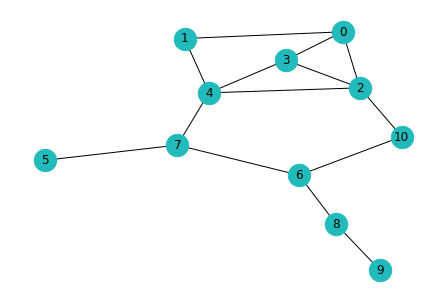

In [6]:
G = nx.Graph()
G.add_edges_from([(0,1), (0,2), (0,3), (1,4), (7,4), (10,2), (2,3), (2,4), (3,4), (6,7), (5,7), (6,8), (8,9), (6,10)])
nx.draw_kamada_kawai(G,with_labels=True, node_color='#22bbbb',node_size=500)
KKL=nx.kamada_kawai_layout(G)

El siguiente código hace una búsqueda por anchura que comienza en $2$. Lo que hace es crear un diccionario de `padres` que nos dice cuál vértice fue descubrierto por cuál. Al final esto es lo que la función regresa.

In [4]:
def BFS_padres(G,v0):
    encontrados={v0}
    procesados=set()
    en_proceso=[v0]
    padres={v0:None}
    while en_proceso:
        v=en_proceso[0]
        for w in G.neighbors(v):
            if (w not in procesados) and (w not in encontrados):
                encontrados.add(w)
                en_proceso.append(w)
                padres[w]=v
        en_proceso.remove(v)
        procesados.add(v)
    return(padres)

dic_padres=BFS_padres(G,2)
print(dic_padres)

{2: None, 0: 2, 10: 2, 3: 2, 4: 2, 1: 0, 6: 10, 7: 4, 8: 6, 5: 7, 9: 8}


Para entender mejor este árbol de padres, vamos a dibujarlo como una gráfica dirigida, en donde pondremos una flecha de un vértice $v$ a un vértice $u$ si $u$ fue descubierto por $v$.

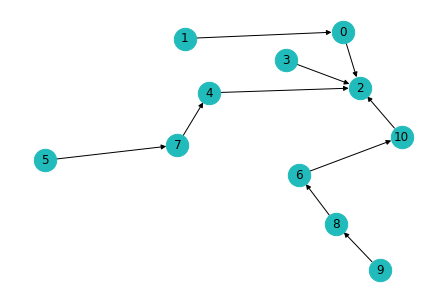

In [8]:
D=nx.DiGraph()
for j in dic_padres:
    if dic_padres[j]!=None:
        D.add_edge(j,dic_padres[j])

nx.draw(D,pos=KKL,with_labels=True, node_color='#22bbbb',node_size=500)

Lo que nos está diciendo este dibujo es, por ejemplo, que $8$ fue descubierto por $6$, que $6$ fue descubierto por $10$ y que $10$ fue descubierto por $2$. El vértice $2$ no fue descubierto por nadie, pues es la raíz.
<span class="math" style="float:right">$\square$</span>

Veamos algunas propiedades de la búsqueda por anchura y del árbol por anchura. En las siguientes proposiciones $G$ es una gráfica conexa, $v_0$ un vértice y $T$ el árbol por anchura correspondiente. Primero veremos que "vértices más cercanos a $v_0$ se visitan antes que vértices más lejanos".

**Proposición.** Sean $u$ y $v$ vértices de $G$. Si la distancia de $v_0$ a $v$ en $G$ es menor que la de $v_0$ a $u$ en $G$, entonces la búsqueda por anchura encuentra primero a $v$ que a $u$.

*Demostración.* Haremos la demostración por inducción sobre la distancia de $v_0$ a $v$. Si dicha distancia es $0$, entonces $v=v_0$. Como $v_0$ es el primer vértice visitado, entonces se visita antes que cualquier otro.

Supongamos que la afirmación es cierta para cuando $v$ tiene cierta distancia $d$. Tomemos vértices $u'$ y $v'$ tales que la distancia de $v_0$ a $v'$ es $d+1$ y la distancia de $v_0$ a $u'$ es un número $k\geq d+2$.

Sea $u$ el padre de $u'$ en $T$. Como la distancia de $v_0$ a $u'$ es mayor o igual a $d+2$, entonces la distancia de $v_0$ a $u$ es mayor o igual a $d+1$ (si no, un camino más corto que eso de $v_0$ a $u$ junto con la arista $uu'$ darían una contradicción). Sea $v$ el penúltimo vértice en un camino de longitud mínima de $v_0$ a $v'$. Como la distancia de $v_0$ a $v'$ es $d+1$, la distancia de $v_0$ a $v$ es $d$.

Por hipótesis inductiva, $v$ se visita antes que $u$. Así, $v'$ se agrega a la lista por visitar a más tardar cuando visitamos $v$, así que en dicha lista queda antes que cualquier cosa que se añade a la lista cuando visitamos $u$. En particular, se agrega a la lista por visitar antes que $u'$. Como los vértices se visitan en el orden que quedan en la lista, $v'$ se visita antes que $u'$.

<span class="math" style="float:right">$\square$</span>

Podemos ser todavía más precisos.

**Proposición.** Si $v$ es padre de $u$ en $T$ y la distancia de $v_0$ a $v$ es $d$, entonces la distancia de $v_0$ a $u$ es $d+1$.

*Demostración.* Un camino de longitud $d$ de $v_0$ a $v$ junto con la arista $vu$ muestran que la distancia de $v_0$ a $u$ es menor o igual a $d+1$.

Veamos que no puede ser menor a $d+1$. Supongamos que hay un camino más corto de $v_0$ a $u$, de longitud $l\leq d$. Sea $v'$ el penúltimo vértice en dicho camino. La distancia de $v_0$ a $l$ es $l-1\leq d-1\lt d$. Por la proposición anterior, entonces el vértice $v'$ se visita antes que el vértice $v$. Pero como $u$ es vecino de $v'$, tendríamos que $u$ se descubriría a más tardar por $v'$, así que $v$ no puede ser su padre. Esto es una contadicción, de modo que la distancia de $v_0$ a $u$ es mayor o igual a $d+1$.

Así, la distancia de $v_0$ a $u$ es $d+1$.

<span class="math" style="float:right">$\square$</span>

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. Dibuja una gráfica con el siguiente conjunto de aristas. Luego, realiza manualmente una búsqueda por anchura que comience en el vértice $a$:

   $$E=\{ag,ad,bf,cd,bd,be,bh,fi,ei,gh\}.$$

2. Sean $n$ y $m$ el número de vértices y aristas, respectivamente, de una gráfica. Encuentra gráficas en donde la búsqueda por anchura tome $\Theta(n)$ pasos. Encuentra gráficas en donde la búsqueda por anchura tome $\Theta(m)$ pasos.
3. Sea $T$ el arbol de anchura de una gráfica $G$ con vértice inicial $v_0$. El **nivel** de un vértice es la cantidad de veces que hay que aplicarle la función `padre` para llegar a $v_0$. Supongamos que $u$ y $v$ son vértices adyacentes en $G$. Muestra que $|\text{nivel}(u)-\text{nivel}(v)|\leq 1$. 
4. Cada vértice de una gráfica se ha pintado rojo o azul. Haz un algoritmo de búsqueda por profundidad que cuente la cantidad de aristas que hay con un extremo rojo y uno azul.
5. Usando búsqueda por anchura, diseña un algoritmo que decida si una gráfica es conexa o no.